<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/Exploration_quest/exploration_6/xp6_controlnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 12-1. 프로젝트: ControlNet으로 조건을 준 이미지 생성하기

**Goal**

`Utilize OpenPose & Canny` to create distinct individual images. Merge them for a new visual experience, blending human actions with edge-detected forms to produce unique, intriguing visuals.

**Index**

    1. What's ControlNet?
    2. Set up
    3. Edge Detection
    4. OpenPose
    5. Edge Detection & OpenPose
    6. Conclusion

### 1. What's ControlNet?

[Adding Conditional Control to Text-to-Image Diffusion Models](https://arxiv.org/abs/2302.05543)

### 2. Set up

In [ ]:
pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# CUDA out of memery

# torch.cuda.empty_cache()

### 3. Edge Detection

[Coding Canny Edge Detection Algorithm from scratch in Python.](https://medium.com/@rohit-krishna/coding-canny-edge-detection-algorithm-from-scratch-in-python-232e1fdceac7)

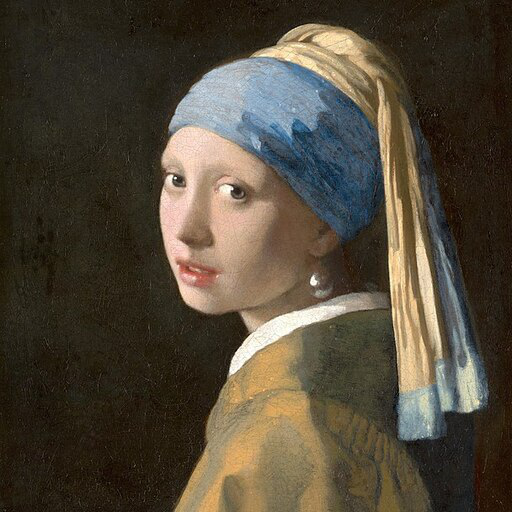

In [ ]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

image

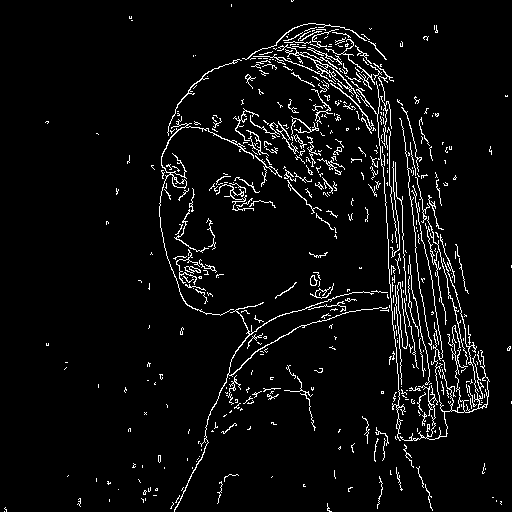

In [ ]:
import cv2
from PIL import Image
import numpy as np

image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

canny_image

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

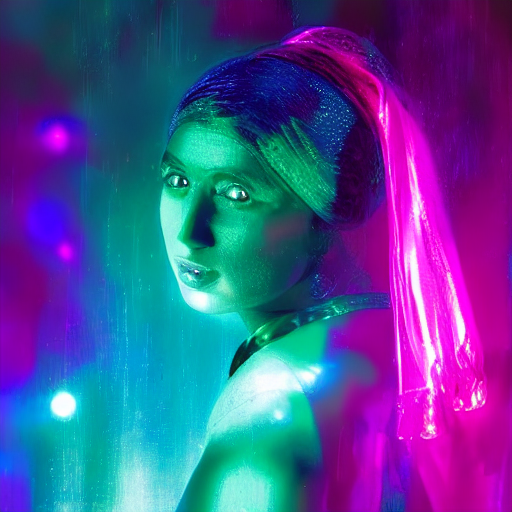

In [ ]:
from diffusers import UniPCMultistepScheduler

canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

generator = torch.manual_seed(0)

canny_image = canny_pipe(
    prompt="disco dancer with colorful lights",
    num_inference_steps=20,
    generator=generator,
    image=canny_image
).images[0]

canny_image.save("/aiffel/aiffel/canny_image.png")

canny_image

### 4. OpenPose

In [ ]:
pip install controlnet-aux==0.0.1

Note: you may need to restart the kernel to use updated packages.


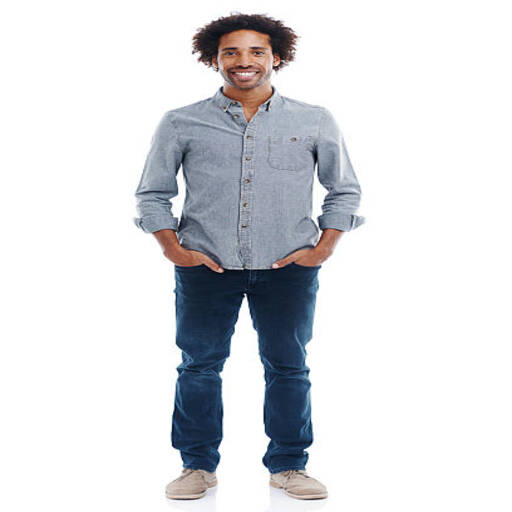

In [ ]:
from diffusers.utils import load_image

openpose_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
)
openpose_image

cuda


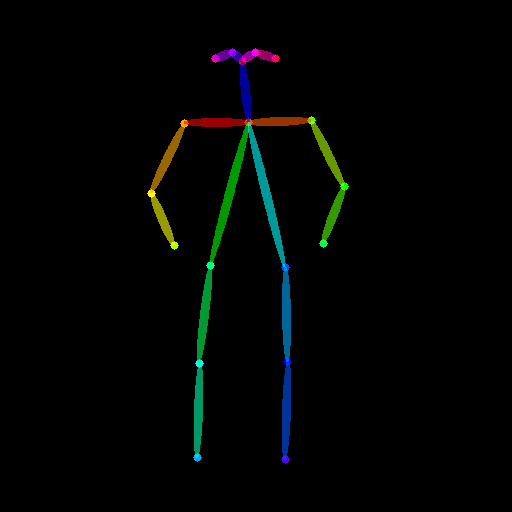

In [ ]:
from controlnet_aux import OpenposeDetector

openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

openpose_image = openpose(openpose_image)
openpose_image

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

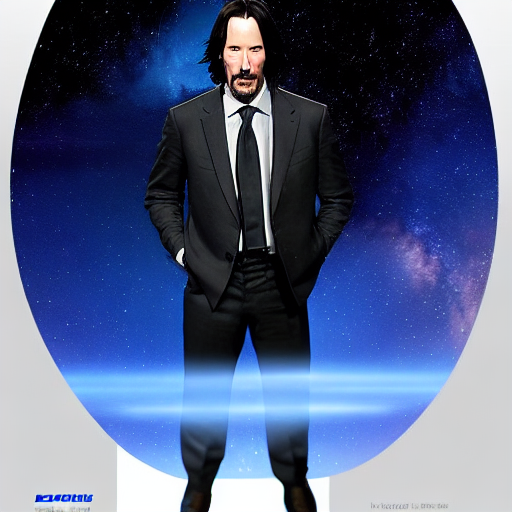

In [ ]:
from diffusers import UniPCMultistepScheduler

openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)
openpose_pipe = openpose_pipe.to("cuda")

generator = torch.manual_seed(0)

prompt = "keanu reeves, Milky Way sky"
negative_prompt = "Colorful, busy, crowded"

images = openpose_image

openpose_image1 = openpose_pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=20,
    generator=generator,
    image=images).images[0]


openpose_image1.save("/aiffel/aiffel/openpose_image1.png")

openpose_image1

### 5. Edge Detection & OpenPose

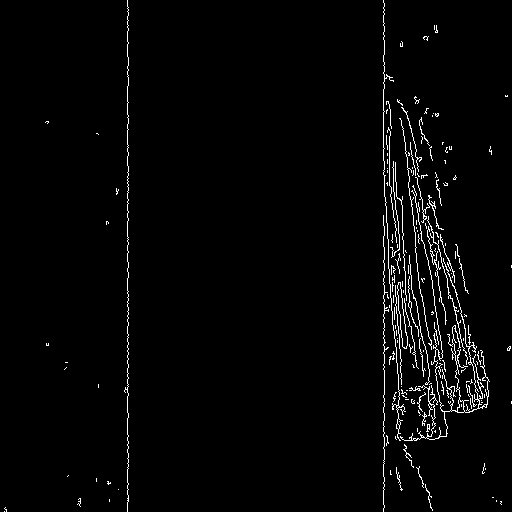

In [ ]:
from diffusers.utils import load_image
from PIL import Image
import cv2
import numpy as np

image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

low_threshold = 100
high_threshold = 200

canny_image = np.array(image)

zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)
canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)
canny_image = Image.fromarray(canny_image)

canny_image

cuda


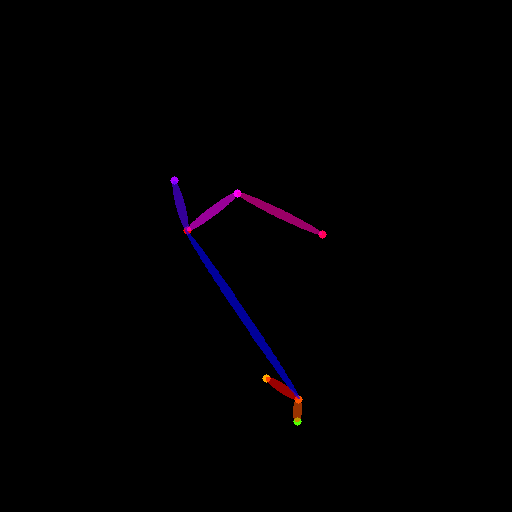

In [ ]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

openpose_image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
openpose_image = openpose(openpose_image)

openpose_image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/26 [00:00<?, ?it/s]

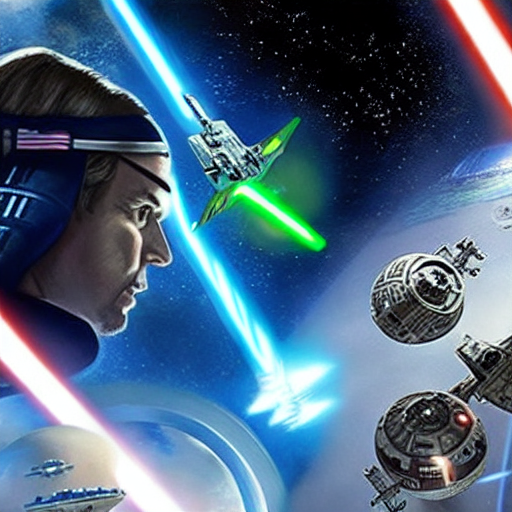

In [ ]:
import torch
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler

controlnet_edge_detection = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
controlnet_openpose = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)

controlnets = [controlnet_edge_detection, controlnet_openpose]

pipe = StableDiffusionControlNetPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", controlnet=controlnets, torch_dtype=torch.float16)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "star wars, space war"
negative_prompt = "colorful, empty, red"

generator = torch.manual_seed(0)

images = [openpose_image, canny_image]

# FYI
# The reason openpose and canny used the same image was to normalize the conditions
# if each photo had a different size or color environment.
# When I even proceeded with normalization, the photos were not mixed properly.
# So I just work using the same photo.

image = pipe(prompt=prompt,
             num_inference_steps=26,
             negative_prompt=negative_prompt,
             generator=generator,
             image=images).images[0]

# image.save("aiffel/aiffel/duh.png")

# dunnowhythehellahavetonsoferrswheneveritriedtosavethisstupidphoto

image

### 6. Conclusion

### Result

![](https://drive.google.com/uc?export=view&id=1OIWQHJuDbH9ykccH5dIjVlZLjgVsCQxO)

![](https://drive.google.com/uc?export=view&id=1RaXelRBVYJSawt7RqUPmezqKI99KKyt4)

![](https://drive.google.com/uc?export=view&id=1WAmYQFI5VwcwuE7fy3JP3TCxXk7JXD1s)

### Retrospect

> OpenPose와 Canny를 활용하여 이미지를 생성하는 작업은 흥미로웠습니다. 입력된 프롬프트의 범위에서 벗어하는 기형의 형상이 도출되기도 했고, 전혀 예상하지 못 했던 이미지사 생성되기도 했어요. 결과적으로 재미있는 작업이었습니다. 작업 과정에서 외부의 이미지를 사용하는 경우, 이미지의 조건(크기, 컬러 등)을 정규화하는 작업이 까다로웠습니다. 정규화를 진행한 후 혼합하여 생성한 이미지 결과물은 만족스럽지 않았어요. 블로그나 르포에 업데이트된 다른 엔지니어들의 작업 내용을 알 수 있어서 좋았습니다. 새로운 기술을 배울 수 있어서 유익했습니다.

### Reference

* [Mikubill / sd-webui-controlnet / OpenPose + Canny to create image #1853](https://github.com/Mikubill/sd-webui-controlnet/discussions/1853)
* [Reddit / Controlnet 1.1 (Openpose fullbody+Canny): Can be a lot of fun](https://www.reddit.com/r/StableDiffusion/comments/12nnwo7/controlnet_11_openpose_fullbodycanny_can_be_a_lot/)
* [멀티 컨트롤넷으로 캐릭터와 배경을 합성해 보기 StableDiffusion WebUi](https://blog.naver.com/PostView.naver?blogId=dk3dcg&logNo=223039145360)
* [How to Control Generated Images by Diffusion Models via ControlNet in Python](https://thepythoncode.com/article/control-generated-images-with-controlnet-with-huggingface)